In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [48]:
data_batdongsan = pd.read_csv('./data_sources/batdongsan_data.csv')
data_thuviennhadat = pd.read_csv('./data_sources/thuviennhadat_data.csv')
data_chotot = pd.read_csv('./data_sources/chotot_data.csv')

data_describe_batdongsan = pd.read_csv('./data_sources/batdongsan_describe_extracted.csv')
data_describe_thuviennhadat = pd.read_csv('./data_sources/thuviennhadat_describe_extracted.csv')
# data_describe_thuviennhadat = pd.read_csv('./data_sources/thuviennhadat_describe_extracted.csv', engine='python', on_bad_lines='skip')
data_describe_chotot = pd.read_csv('./data_sources/chotot_describe_extracted.csv')

data_address_batdongsan = pd.read_csv('./data_sources/parsed_batdongsan_addresses.csv')
data_address_thuviennhadat = pd.read_csv('./data_sources/parsed_thuviennhadat_addresses.csv')
data_address_chotot = pd.read_csv('./data_sources/parsed_chotot_addresses.csv')

In [45]:
data_describe_thuviennhadat['gender_requirement'].value_counts()
data_describe_thuviennhadat['room_type'].value_counts(dropna=False)

room_type
phòng trọ         615
NaN               372
chung cư mini     130
phòng khép kín     68
phòng ghép         12
Name: count, dtype: int64

In [107]:
data_describe_batdongsan['gender_requirement'].value_counts()
data_describe_batdongsan['room_type'].value_counts(dropna=False)

room_type
NaN               43
phòng trọ         42
chung cư mini     25
phòng khép kín     4
Name: count, dtype: int64

## **DATA PREPARATION**

### **FILE VERIFIED (batdongsan, thuviennhadat)**

In [343]:
data_verified = pd.read_csv('./not_final_data_verified.csv')
data_verified.head(3)

,merge_file_id,source_post,link,title,price,area,start_post_day,end_post_day,describe,address,province/city,district,ward,street,house_number
0,p1-l0_20250320-000509,batdongsan,https://batdongsan.com.vn/cho-thue-nha-tro-pho...,Khai trương phòng Nguyễn Duy Trinh giá 3tr8.Ch...,3800000,22.0,2025-03-18,2025-04-02,"\n Phòng cho thuê tại Quận 2, H...","Đường Nguyễn Duy Trinh, Phường Bình Trưng Đông...",Hồ Chí Minh,Quận 2,Phường Bình Trưng Đông,Đường Nguyễn Duy Trinh,NaN
1,p1-l10_20250320-000536,batdongsan,https://batdongsan.com.vn/cho-thue-nha-tro-pho...,\n Chính chủ cho thuê phòng...,5900000,35.0,2025-03-06,2025-04-05,\n Phòng trọ nằm ở 15B/105 ...,"15B/105 Đường Lê Thánh Tôn, Phường Bến Nghé, Q...",Hồ Chí Minh,Quận 1,Phường Bến Nghé,15B/105 Đường Lê Thánh Tôn,NaN
2,p1-l11_20250320-000536,batdongsan,https://batdongsan.com.vn/cho-thue-nha-tro-pho...,\n Khai trương CHDV full nộ...,7000000,40.0,2025-03-19,2025-03-29,"\n Tô Hiến Thành, P13, Q10....","Đường Tô Hiến Thành, Phường 13, Quận 10, Hồ Ch...",Hồ Chí Minh,Quận 10,Phường 13,Đường Tô Hiến Thành,NaN


In [345]:
data_verified.drop(columns=['start_post_day', 'end_post_day'], inplace=True)

In [348]:
data_verified.columns

Index(['merge_file_id', 'source_post', 'link', 'title', 'price', 'area',
       'describe', 'address', 'province/city', 'district', 'ward', 'street',
       'house_number'],
      dtype='object')

In [349]:
data_verified.columns = [
    'merge_file_id', 'source_post', 'link', 'title', 'price', 'area',
    'describe', 'address', 'province_city', 'district', 'ward', 'street',
    'house_number'
]

In [350]:
data_verified = data_verified.apply(lambda x: x.strip() if isinstance(x, str) else x)

In [351]:
data_verified.to_csv('final_data_verified.csv', index=False)

### **FILE UNVERIFIED (chotot)**

In [353]:
data_unverified = pd.read_csv('./data_sources/data_unverified_missing.csv')
data_unverified.head(3)

,merge_file_id,source_post,link,title,price,area,address,describe
0,p1-l11_20250404-155753,chotot,https://www.nhatot.com/thue-phong-tro-quan-5-t...,Phòng cao cấp mới xây Cao Đạt,"5,4 triệu/tháng",16 m²,"Đường Cao Đạt, Phường 1, Quận 5, Tp Hồ Chí Minh",✨Phòng NỘI THẤT Cao Cấp Q5\nAddress: Cao Đạt ...
1,p135-l14_20250404-172843,chotot,https://www.nhatot.com/thue-phong-tro-huyen-nh...,"DUPLEX Đủ Nội Thất Rộng Gác Cao Gần TDTU, RMIT...","4,2 triệu/tháng",30 m²,"Đường Trần Thị Liền, Xã Phước Kiển, Huyện Nhà ...","Mình đang trống 2 phòng đủ nội thất, phòng rộn..."
2,p30-l2_20250404-160805,chotot,https://www.nhatot.com/thue-phong-tro-quan-7-t...,Cho thuê phòng trọ có gác. Ngay KDC Nam Long #...,"3,7 triệu/tháng",25 m²,"Đường Huỳnh Tấn Phát, Phường Tân Thuận Đông, Q...","Cho thuê phòng trọ giá có gác, có cửa sổ. Thoá..."


In [354]:
data_unverified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   merge_file_id  745 non-null    object
 1   source_post    745 non-null    object
 2   link           745 non-null    object
 3   title          745 non-null    object
 4   price          745 non-null    object
 5   area           745 non-null    object
 6   address        745 non-null    object
 7   describe       745 non-null    object
dtypes: object(8)
memory usage: 46.7+ KB


In [355]:
data_unverified.nunique()

merge_file_id    745
source_post        1
link             745
title            745
price             69
area              29
address          418
describe         736
dtype: int64

In [179]:
data_unverified['price'].value_counts()

price
4 triệu/tháng       54
3,8 triệu/tháng     43
3,5 triệu/tháng     42
4,5 triệu/tháng     40
5 triệu/tháng       36
3,2 triệu/tháng     31
6,5 triệu/tháng     28
3 triệu/tháng       28
3,7 triệu/tháng     27
3,3 triệu/tháng     24
5,5 triệu/tháng     23
6 triệu/tháng       22
4,8 triệu/tháng     22
4,2 triệu/tháng     21
7 triệu/tháng       19
3,6 triệu/tháng     18
4,7 triệu/tháng     17
3,9 triệu/tháng     16
3,4 triệu/tháng     16
4,9 triệu/tháng     15
4,3 triệu/tháng     14
800000 đ/tháng      13
4,6 triệu/tháng     10
2,5 triệu/tháng      9
4,4 triệu/tháng      8
3,1 triệu/tháng      7
6,2 triệu/tháng      7
5,2 triệu/tháng      7
2,6 triệu/tháng      7
6,8 triệu/tháng      7
4,1 triệu/tháng      7
5,8 triệu/tháng      7
2,3 triệu/tháng      6
2,4 triệu/tháng      6
7,5 triệu/tháng      6
6,6 triệu/tháng      5
2,8 triệu/tháng      5
5,7 triệu/tháng      5
2,9 triệu/tháng      5
8,5 triệu/tháng      5
5,4 triệu/tháng      4
2,7 triệu/tháng      4
5,9 triệu/tháng      4
1,1 t

In [356]:
data_unverified[~data_unverified['price'].str.contains('triệu/tháng')]['price'].value_counts()

price
800000 đ/tháng    13
950000 đ/tháng     1
Name: count, dtype: int64

In [357]:
# Xu li đ/tháng
data_unverified.loc[data_unverified['price'].str.contains('đ/tháng', na=False), 'price'] = '0,' + data_unverified.loc[data_unverified['price'].str.contains('đ/tháng', na=False), 'price'].str.replace('đ/tháng', 'triệu/tháng', regex=False)

# Tach so ra
data_unverified['price'] = data_unverified['price'].str.replace(',', '.').str.extract(r'([\d\.]+)')

# Chuyen type float64
data_unverified['price'] = data_unverified['price'].astype('float64')
data_unverified['price'] = data_unverified['price'] * 1000000

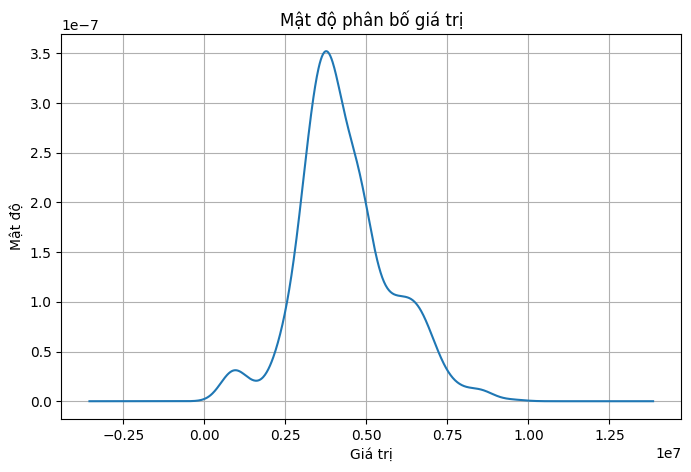

In [358]:
plt.figure(figsize=(8, 5))
data_unverified['price'].plot(kind='density')

plt.title('Mật độ phân bố giá trị')
plt.xlabel('Giá trị')
plt.ylabel('Mật độ')
plt.grid(True)
plt.show()

In [183]:
data_unverified['area'].value_counts()

area
25 m²     233
30 m²     137
20 m²     105
35 m²      78
40 m²      30
28 m²      27
15 m²      16
27 m²      15
22 m²      15
24 m²      14
18 m²      13
23 m²      10
26 m²      10
32 m²       8
50 m²       5
45 m²       5
38 m²       4
70 m²       3
60 m²       3
16 m²       2
21 m²       2
34 m²       2
80 m²       2
48 m²       1
17 m²       1
36 m²       1
200 m²      1
100 m²      1
19 m²       1
Name: count, dtype: int64

In [359]:
data_unverified['area'] = data_unverified['area'].str.extract(r'(\d+)')
data_unverified['area'] = data_unverified['area'].astype('float64')

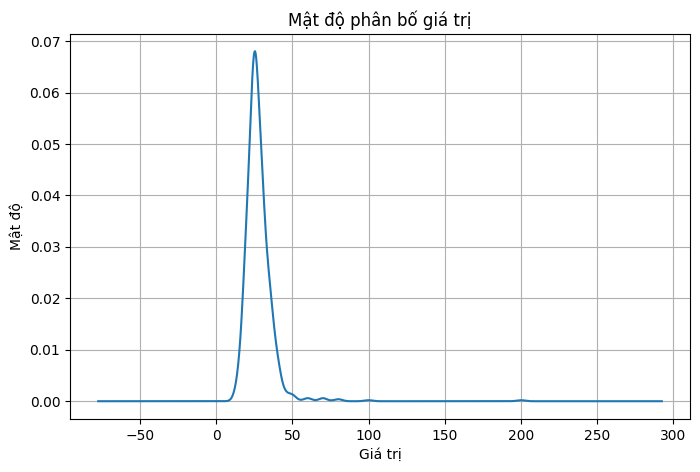

In [185]:
plt.figure(figsize=(8, 5))
data_unverified['area'].plot(kind='density')

plt.title('Mật độ phân bố giá trị')
plt.xlabel('Giá trị')
plt.ylabel('Mật độ')
plt.grid(True)
plt.show()

In [360]:
pd.set_option('display.max_rows', None)
data_unverified['address'].value_counts()

address
Đường Hòa Bình, Phường 3, Quận 11, Tp Hồ Chí Minh                                                   20
Đường Lạc Long Quân, Phường 5, Quận 11, Tp Hồ Chí Minh                                              14
Đường Lê Hồng Phong, Phường 2, Quận 10, Tp Hồ Chí Minh                                              12
Cầu Nguyễn Tri Phương, Phường 6, Quận 5, Tp Hồ Chí Minh                                             10
Đường Lý Chiêu Hoàng, Phường 10, Quận 6, Tp Hồ Chí Minh                                              9
Đường Võ Văn Kiệt, Phường 13, Quận 5, Tp Hồ Chí Minh                                                 8
Đường Lý Thường Kiệt, Phường 14, Quận 10, Tp Hồ Chí Minh                                             8
Đường An Dương Vương, Phường 9, Quận 5, Tp Hồ Chí Minh                                               7
Đường Lê Văn Sỹ, Phường 12, Quận 3, Tp Hồ Chí Minh                                                   7
Đường Nguyễn Trãi, Phường Nguyễn Cư Trinh, Quận 1, Tp Hồ Chí Minh

In [361]:
parts = data_unverified['address'].str.split(', ')
parts = parts.apply(lambda x: x[::-1])

In [362]:
address_extracted = pd.DataFrame(list(parts), columns=['province_city', 'district', 'ward', 'street', 'house_number'])

In [363]:
address_extracted = address_extracted.apply(lambda x: x.title() if isinstance(x, str) else x)

In [ ]:
address_extracted.isna().sum()

In [190]:
address_extracted.nunique()

province_city      1
district          11
ward              55
street           240
house_number      66
dtype: int64

In [191]:
address_extracted['district'].value_counts()

district
Quận 5              140
Quận 10             124
Quận 6               95
Quận 3               88
Quận 11              80
Quận 1               62
Quận 7               61
Quận 12              43
Quận 4               29
Huyện Bình Chánh     15
Huyện Nhà Bè          8
Name: count, dtype: int64

In [192]:
address_extracted['ward'].value_counts(ascending=True)

ward
Phường Thạnh Xuân           1
Phường Tân Hưng Thuận       1
Xã Phú Xuân                 1
Phường Tân Phong            1
                            1
Phường Tân Thới Hiệp        1
Phường Nguyễn Thái Bình     1
Thị trấn Nhà Bè             2
Phường Phú Mỹ               2
Phường Hiệp Thành           2
Phường Tân Chánh Hiệp       2
Phường Tân Thuận Tây        3
Phường Phạm Ngũ Lão         3
Phường Thới An              3
Phường Cầu Ông Lãnh         3
Phường Tân Hưng             3
Phường 16                   4
Phường Tân Thới Nhất        4
Phường Tân Kiểng            4
Xã Phong Phú                4
Phường Đông Hưng Thuận      4
Phường 18                   4
Phường Cô Giang             4
Phường Tân Thuận Đông       4
Xã Phước Kiển               5
Phường Cầu Kho              6
Phường Bến Nghé             6
Phường Tân Phú              6
Phường Thạnh Lộc            7
Phường An Phú Đông          7
Phường Tân Quy              7
Phường Phú Thuận            8
Phường Bến Thành            8
Phườn

In [193]:
address_extracted['street'].value_counts(ascending=True)

street
thạnh xuân 22                                 1
Đường Đông Hưng Thuận 42                      1
Nguyễn Văn Linh                               1
Đường Trần Nhân Tôn                           1
Đường Thái Phiên                              1
Hẻm 353 Đường Phạm Ngũ Lão                    1
Đường số 3                                    1
Hẻm 118 Đường Nguyễn Thị Thập                 1
Đường Tân Thới Nhất 5                         1
Đường Ký Hòa                                  1
Đường Ngã Bảy Lý Thái Tổ                      1
Cầu vượt Quang Trung 2                        1
Đường Số 52                                   1
Thiên Phước                                   1
Đường Võ Thị Phải                             1
Đường Đinh Tiên Hoàng                         1
Đường Lê Văn Khương                           1
Hàm Nghi                                      1
Đường Vành Đai                                1
Đường 36                                      1
Đường Bình Thới                  

In [364]:
final_data_unverified = pd.concat([data_unverified, address_extracted], axis=1)

In [365]:
final_data_unverified.head(5)

,merge_file_id,source_post,link,title,price,area,address,describe,province_city,district,ward,street,house_number
0,p1-l11_20250404-155753,chotot,https://www.nhatot.com/thue-phong-tro-quan-5-t...,Phòng cao cấp mới xây Cao Đạt,5400000.0,16.0,"Đường Cao Đạt, Phường 1, Quận 5, Tp Hồ Chí Minh",✨Phòng NỘI THẤT Cao Cấp Q5\nAddress: Cao Đạt ...,Tp Hồ Chí Minh,Quận 5,Phường 1,Đường Cao Đạt,None
1,p135-l14_20250404-172843,chotot,https://www.nhatot.com/thue-phong-tro-huyen-nh...,"DUPLEX Đủ Nội Thất Rộng Gác Cao Gần TDTU, RMIT...",4200000.0,30.0,"Đường Trần Thị Liền, Xã Phước Kiển, Huyện Nhà ...","Mình đang trống 2 phòng đủ nội thất, phòng rộn...",Tp Hồ Chí Minh,Huyện Nhà Bè,Xã Phước Kiển,Đường Trần Thị Liền,None
2,p30-l2_20250404-160805,chotot,https://www.nhatot.com/thue-phong-tro-quan-7-t...,Cho thuê phòng trọ có gác. Ngay KDC Nam Long #...,3700000.0,25.0,"Đường Huỳnh Tấn Phát, Phường Tân Thuận Đông, Q...","Cho thuê phòng trọ giá có gác, có cửa sổ. Thoá...",Tp Hồ Chí Minh,Quận 7,Phường Tân Thuận Đông,Đường Huỳnh Tấn Phát,None
3,p141-l7_20250404-172843,chotot,https://www.nhatot.com/thue-phong-tro-quan-11-...,PHÒNG TRỌ GIÁ SIÊU RẺ GẦN ĐẦM SEN - ĐẠI HỌC V...,2700000.0,25.0,"Đường Hòa Bình, Phường 3, Quận 11, Tp Hồ Chí Minh","Vị Trí: Đường Hoà bình, gần Luỹ Bán Bích, Âu C...",Tp Hồ Chí Minh,Quận 11,Phường 3,Đường Hòa Bình,None
4,p1-l15_20250404-155753,chotot,https://www.nhatot.com/thue-phong-tro-quan-10-...,🏠CHO THUÊ 1 PHÒNG NGỦ MỚI 100% SÁT QUẬN 10_CỬA...,5200000.0,30.0,"Đường Lý Thường Kiệt, Phường 15, Quận 10, Tp H...",Vị Trí : Lý Thường Kiệt - Quận 10 \n( Gần ĐH B...,Tp Hồ Chí Minh,Quận 10,Phường 15,Đường Lý Thường Kiệt,None


In [199]:
final_data_unverified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   merge_file_id  745 non-null    object 
 1   source_post    745 non-null    object 
 2   link           745 non-null    object 
 3   title          745 non-null    object 
 4   price          745 non-null    float64
 5   area           745 non-null    float64
 6   address        745 non-null    object 
 7   describe       745 non-null    object 
 8   province_city  745 non-null    object 
 9   district       745 non-null    object 
 10  ward           745 non-null    object 
 11  street         745 non-null    object 
 12  house_number   83 non-null     object 
dtypes: float64(2), object(11)
memory usage: 75.8+ KB


In [366]:
final_data_unverified = final_data_unverified.apply(lambda x: x.strip() if isinstance(x, str) else x)

In [367]:
# khong tim dc li do, page source describe k ghi, link da die
final_data_unverified[final_data_unverified['ward'] == '']

,merge_file_id,source_post,link,title,price,area,address,describe,province_city,district,ward,street,house_number
272,p167-l5_20250404-173602,chotot,https://www.nhatot.com/thue-phong-tro-quan-6-t...,🏡PHÒNG TRỌ FULL NỘI THẤT Ở SÁT RẠP PHIM GALAXY...,3700000.0,25.0,"Đường Kinh Dương Vương, , Quận 6, Tp Hồ Chí Minh",✨TRỐNG RA 1 PHÒNG TRỌ GIÁ MỀM FULL NỘI THẤT Ở ...,Tp Hồ Chí Minh,Quận 6,,Đường Kinh Dương Vương,None


In [368]:
# Delete row
final_data_unverified = final_data_unverified[final_data_unverified['ward'] != '']

In [369]:
final_data_unverified.to_csv('final_data_unverified.csv', index=False)

### **MERGE DATA**

In [370]:
data_verified = pd.read_csv('final_data_verified.csv')
data_unverified = pd.read_csv('final_data_unverified.csv')

In [371]:
data_verified.head(3)

,merge_file_id,source_post,link,title,price,area,describe,address,province_city,district,ward,street,house_number
0,p1-l0_20250320-000509,batdongsan,https://batdongsan.com.vn/cho-thue-nha-tro-pho...,Khai trương phòng Nguyễn Duy Trinh giá 3tr8.Ch...,3800000,22.0,"\n Phòng cho thuê tại Quận 2, H...","Đường Nguyễn Duy Trinh, Phường Bình Trưng Đông...",Hồ Chí Minh,Quận 2,Phường Bình Trưng Đông,Đường Nguyễn Duy Trinh,NaN
1,p1-l10_20250320-000536,batdongsan,https://batdongsan.com.vn/cho-thue-nha-tro-pho...,\n Chính chủ cho thuê phòng...,5900000,35.0,\n Phòng trọ nằm ở 15B/105 ...,"15B/105 Đường Lê Thánh Tôn, Phường Bến Nghé, Q...",Hồ Chí Minh,Quận 1,Phường Bến Nghé,15B/105 Đường Lê Thánh Tôn,NaN
2,p1-l11_20250320-000536,batdongsan,https://batdongsan.com.vn/cho-thue-nha-tro-pho...,\n Khai trương CHDV full nộ...,7000000,40.0,"\n Tô Hiến Thành, P13, Q10....","Đường Tô Hiến Thành, Phường 13, Quận 10, Hồ Ch...",Hồ Chí Minh,Quận 10,Phường 13,Đường Tô Hiến Thành,NaN


In [372]:
data_unverified.head(3)

,merge_file_id,source_post,link,title,price,area,address,describe,province_city,district,ward,street,house_number
0,p1-l11_20250404-155753,chotot,https://www.nhatot.com/thue-phong-tro-quan-5-t...,Phòng cao cấp mới xây Cao Đạt,5400000.0,16.0,"Đường Cao Đạt, Phường 1, Quận 5, Tp Hồ Chí Minh",✨Phòng NỘI THẤT Cao Cấp Q5\nAddress: Cao Đạt ...,Tp Hồ Chí Minh,Quận 5,Phường 1,Đường Cao Đạt,NaN
1,p135-l14_20250404-172843,chotot,https://www.nhatot.com/thue-phong-tro-huyen-nh...,"DUPLEX Đủ Nội Thất Rộng Gác Cao Gần TDTU, RMIT...",4200000.0,30.0,"Đường Trần Thị Liền, Xã Phước Kiển, Huyện Nhà ...","Mình đang trống 2 phòng đủ nội thất, phòng rộn...",Tp Hồ Chí Minh,Huyện Nhà Bè,Xã Phước Kiển,Đường Trần Thị Liền,NaN
2,p30-l2_20250404-160805,chotot,https://www.nhatot.com/thue-phong-tro-quan-7-t...,Cho thuê phòng trọ có gác. Ngay KDC Nam Long #...,3700000.0,25.0,"Đường Huỳnh Tấn Phát, Phường Tân Thuận Đông, Q...","Cho thuê phòng trọ giá có gác, có cửa sổ. Thoá...",Tp Hồ Chí Minh,Quận 7,Phường Tân Thuận Đông,Đường Huỳnh Tấn Phát,NaN


In [373]:
data = pd.concat([data_verified, data_unverified])

In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1967 entries, 0 to 743
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   merge_file_id  1967 non-null   object 
 1   source_post    1967 non-null   object 
 2   link           1967 non-null   object 
 3   title          1967 non-null   object 
 4   price          1967 non-null   float64
 5   area           1967 non-null   float64
 6   describe       1967 non-null   object 
 7   address        1967 non-null   object 
 8   province_city  1967 non-null   object 
 9   district       1967 non-null   object 
 10  ward           1967 non-null   object 
 11  street         854 non-null    object 
 12  house_number   94 non-null     object 
dtypes: float64(2), object(11)
memory usage: 215.1+ KB


In [375]:
data['province_city'].value_counts()

province_city
Hồ Chí Minh       1222
Tp Hồ Chí Minh     744
Hồ Chí Minh ko       1
Name: count, dtype: int64

In [376]:
data.loc[data['province_city'] == 'Tp Hồ Chí Minh', ['province_city']] = 'Hồ Chí Minh'
data.loc[data['province_city'] == 'Hồ Chí Minh ko', ['province_city']] = 'Hồ Chí Minh'

In [377]:
data['district'].value_counts().sort_index()

district
Bình Chánh             1
Bình Thạnh            20
Gò Vấp                11
Huyện Bình Chánh      26
Huyện Hóc Môn          7
Huyện Nhà Bè          12
Phú Nhuận              3
Quận 1               107
Quận 10              171
Quận 11               91
Quận 12              108
Quận 2                 9
Quận 3               135
Quận 4                59
Quận 5               180
Quận 6               113
Quận 7               180
Quận 8                62
Quận 9                11
Quận Bình Thạnh       90
Quận Bình Tân         62
Quận Gò Vấp          117
Quận Phú Nhuận        39
Quận Tân Bình        155
Quận Tân Phú          80
Thành phố Thủ Đức    100
Thủ Đức                4
Tân Bình              13
Tân Phú                1
Name: count, dtype: int64

In [378]:
data['district'] = data['district'].str.replace(r'(Quận|Huyện|Thành phố)', '', regex=True).str.strip()

In [379]:
# Quận 2, quận 9 sát nhập Thủ Đức
data.loc[(data['district'] == '2') | ((data['district'] == '9')), ['district']] = 'Thủ Đức'

In [380]:
data['district'].value_counts().sort_index()

district
1             107
10            171
11             91
12            108
3             135
4              59
5             180
6             113
7             180
8              62
Bình Chánh     27
Bình Thạnh    110
Bình Tân       62
Gò Vấp        128
Hóc Môn         7
Nhà Bè         12
Phú Nhuận      42
Thủ Đức       124
Tân Bình      168
Tân Phú        81
Name: count, dtype: int64

In [381]:
data['ward'].value_counts().sort_index()

ward
Phường  Thạnh Mỹ Lợi         1
Phường 1                    75
Phường 10                   84
Phường 11                   66
Phường 12                   96
Phường 13                  131
Phường 14                  143
Phường 15                   65
Phường 16                   15
Phường 17                    3
Phường 18                    4
Phường 19                    7
Phường 2                    95
Phường 21                    1
Phường 22                    7
Phường 24                    7
Phường 25                   16
Phường 26                   12
Phường 3                    81
Phường 4                    57
Phường 5                    72
Phường 6                    58
Phường 7                    30
Phường 8                    31
Phường 9                    68
Phường An Khánh              7
Phường An Lạc                4
Phường An Lạc A              2
Phường An Phú                1
Phường An Phú Đông          20
Phường Bình Chiểu            1
Phường Bình Hưng Hoà A      12
Phư

In [382]:
data['ward'] = data['ward'].str.replace(r'(Phường|Xã|Thị trấn)', '', regex=True).str.strip()

In [383]:
data['price'] = data['price'] / 1000000

In [384]:
data['price'].value_counts()

price
3.500000      129
4.000000      127
4.500000      100
3.000000       91
5.000000       78
3.800000       75
2.500000       68
3.200000       65
2.800000       53
4.200000       53
5.500000       51
6.500000       50
6.000000       47
3.300000       46
3.600000       45
3.700000       45
7.000000       42
3.900000       38
4.300000       36
4.800000       36
2.000000       34
3.400000       31
2.600000       30
4.900000       27
4.700000       24
4.600000       20
2.200000       19
1.600000       18
2.400000       18
0.800000       18
6.800000       17
4.400000       17
3.100000       17
5.200000       17
1.500000       16
2.300000       16
2.700000       15
8.000000       15
5.700000       14
7.500000       14
5.800000       14
1.800000       13
5.300000       13
12.300000      13
1.000000       13
2.900000       13
5.900000       12
8.500000       11
5.400000       10
1.100000        9
6.200000        9
6.300000        8
6.600000        8
1.300000        8
9.000000        7
4.10

In [385]:
data[data['price'] > 20.0][['link', 'price']].to_dict()

{'link': {242: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-phong-tro-30-m2-tai-300-23-23a-nguyen-van-linh-quan-7-ho-chi-minh-gia-chi-990-000-vnd-19250.html',
  678: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/nha-tro-sach-se-don-vi-nhan-khoan-toa-nha-cho-thue-tro-16136.html',
  1065: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-phong-tro-dien-tich-40m2-tai-76-13-13-pham-duc-son-quan-8-day-du-tien-nghi-chi-viec-ve-o-ngay-2333.html',
  1123: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-88-phong-tro-gia-250-trieu-dong-con-thuong-luong-1744.html',
  1221: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/phong-tro-gia-re-quan-binh-thanh-2169.html'},
 'price': {242: 990.0, 678: 200.0, 1065: 50.0, 1123: 250.0, 1221: 28.0}}

In [386]:
data.loc[data['price'] == 990.0, ['price']] = 0.99
data = data[~data['price'].isin([200.0, 250.0])]

In [387]:
data['area'].value_counts()

area
25.0     438
30.0     349
20.0     279
35.0     176
40.0     112
18.0      66
15.0      64
28.0      58
22.0      39
45.0      38
24.0      37
16.0      30
27.0      29
26.0      27
50.0      26
12.0      25
32.0      22
60.0      20
23.0      12
10.0      12
17.0       9
70.0       8
14.0       8
33.0       7
55.0       7
36.0       7
21.0       6
38.0       6
100.0      5
80.0       4
34.0       4
0.0        3
19.0       3
42.0       3
31.0       2
13.0       2
37.0       1
28.5       1
120.0      1
75.0       1
10.4       1
68.0       1
11.0       1
270.0      1
15.4       1
180.0      1
65.0       1
160.0      1
85.0       1
46.0       1
90.0       1
6.0        1
280.0      1
57.0       1
290.0      1
320.0      1
48.0       1
200.0      1
Name: count, dtype: int64

In [388]:
data.loc[data['area'] > 100, ['link', 'area']].to_dict()

{'link': {402: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/phong-o-ghep-khu-dan-cu-cao-cap-tp-thu-duc-18191.html',
  724: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-phong-nha-moi-xay-tai-666-29-7-duong-3-2-quan-10-ho-chi-minh-dien-tich-270m2-15511.html',
  891: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-phong-tro-180-m2-128-10-dien-bien-phu-binh-thanh-tien-nghi-day-du-11280.html',
  964: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-phong-tro-4m-x-4m-8k1-8-phuong-14-quan-8-ve-sinh-rieng-thoang-mat-5861.html',
  1058: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-phong-rong-rai-280m2-quan-10-nha-moi-xay-tien-nghi-day-du-gia-chi-4-trieu-vnd-2547.html',
  1085: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-phong-ngang-290m2-tai-666-29-7-duong-3-2-quan-10-ho-chi-minh-tien-nghi-an-ninh-2183.html',
  1213: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-phong-tro---86239-thich-quang-duc-677.html',
  646: 'https://www.n

In [389]:
data = data[~(data['area'] > 100)]

In [390]:
data = data[data['area'] != 0]

In [391]:
data.to_csv('final_data.csv', index=False)

## **ISOLATION FOREST**

In [392]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [393]:
df = pd.read_csv('final_data.csv')
df.sample(3)

,merge_file_id,source_post,link,title,price,area,describe,address,province_city,district,ward,street,house_number
975,p82-l12_20250321-114439,thuviennhadat,https://thuviennhadat.vn/nha-dat-thue-chi-tiet...,"Cho thuê nhà nguyên căn 40m2 tại đường 47, Hiệ...",7.5,40.0,"\r\n Nhà nguyên căn cho thuê tại đường 47, ...","Xã Bình Chánh, Huyện Bình Chánh, Hồ Chí Minh",Hồ Chí Minh,Bình Chánh,Bình Chánh,NaN,NaN
865,p74-l4_20250321-114439,thuviennhadat,https://thuviennhadat.vn/nha-dat-thue-chi-tiet...,Phòng trọ 20m2 đường Dạ Nam Quận 8,2.5,20.0,\r\n CHÍNH CHỦ CHO THUÊ :CHO SINH VIÊN TH...,"Phường 2, Quận 8, Hồ Chí Minh",Hồ Chí Minh,8,2,NaN,NaN
1572,p187-l19_20250404-173602,chotot,https://www.nhatot.com/thue-phong-tro-quan-4-t...,"🎉CHO THUÊ PHÒNG GIÁ RẺ 4,XX CÓ NỘI THẤT_GẦN ĐH...",4.1,25.0,Tôn Thất Thuyết - Quận 4\n\nĐiện : 3900/số\nN...,"Đường Tôn Thất Thuyết, Phường 16, Quận 4, Tp H...",Hồ Chí Minh,4,16,Đường Tôn Thất Thuyết,NaN


In [394]:
def prepare_train_data(data_train):
    df = data_train.copy()

    # --- STEP 1: Feature Engineering ---
    df['price_per_m2'] = df['price'] / df['area']
    df['district_ward'] = df['district'] + "_" + df['ward']

    # --- STEP 2: Fit encoders ---
    label_cols = ['province_city', 'district', 'ward', 'district_ward']
    encoders = {}
    for col in label_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le

    # --- STEP 3: Feature interaction ---
    df['area_x_district'] = df['area'] * df['district']
    df['price_per_m2_x_district'] = df['price_per_m2'] * df['district']

    # --- STEP 4: Ward, district average price ---
    ward_avg_price_per_m2 = df.groupby('ward')['price_per_m2'].mean().to_dict()
    df['price_per_m2_error_vs_ward_avg'] = df['price_per_m2'] - df['ward'].map(ward_avg_price_per_m2)

    district_avg_price_per_m2 = df.groupby('district')['price_per_m2'].mean().to_dict()
    df['price_per_m2_error_vs_district_avg'] = df['price_per_m2'] - df['district'].map(district_avg_price_per_m2)

    # --- STEP 5: Chọn feature đầu vào mô hình ---
    model_features = [
        'price_per_m2',
        'district',
        'ward',
        'district_ward',
        'area',
        'area_x_district',
        'price_per_m2_x_district',
        'price_per_m2_error_vs_ward_avg',
        'price_per_m2_error_vs_district_avg'
    ]
    df_model = df[model_features]

    # --- STEP 6: Scale ---
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_model)

    # --- STEP 7: Train Isolation Forest ---
    model = IsolationForest(contamination=0.05, random_state=42)
    model.fit(df_scaled)

    return model, scaler, encoders, ward_avg_price_per_m2, district_avg_price_per_m2

In [395]:
model, scaler, encoders, ward_avg_price_per_m2, district_avg_price_per_m2 = prepare_train_data(df)

with open('model_bundle.pkl', 'w') as file:
    joblib.dump({
        'model': model,
        'scaler': scaler,
        'encoders': encoders,
        'ward_avg_price_per_m2': ward_avg_price_per_m2,
        'district_avg_price_per_m2': district_avg_price_per_m2
    }, '/Users/hoangvinh/Library/CloudStorage/OneDrive-Personal/Workspace/scraping_motel_room_v2/model_bundle.pkl')